In [38]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('../data/highered.pkl')

In [4]:
df.shape

(531216, 126)

In [7]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,PERSONID,YEAR,WEIGHT,SAMPLE,SURID,MRDG,MR03Y5,NMRMEDR,NMRMEMG,LFSTAT,...,ICCOMM,ICTRLA,ICTRLH,ICWBVT,NWFAM,NWLAY,NWNOND,NWOCNA,NWOTP,NWSTU
0,50000030000000003,2003,372.6047,601,1,1,1981,719995,7,1,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
1,50000030000000004,2003,341.7484,601,1,1,1961,719995,7,1,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
2,50000030000000005,2003,522.5629,601,1,1,1966,799995,7,1,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
3,50000030000000006,2003,135.0212,601,1,2,1996,298895,2,1,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
4,50000030000000104,2003,907.4463,601,1,2,1976,438995,4,3,...,NaN,NaN,NaN,NaN,0,0,0,0,1,0


In [28]:
df.isnull().sum()

PERSONID    0
YEAR        0
WEIGHT      0
SAMPLE      0
SURID       0
           ..
NWLAY       0
NWNOND      0
NWOCNA      0
NWOTP       0
NWSTU       0
Length: 125, dtype: int64

In [9]:
df.describe()

,PERSONID,YEAR,WEIGHT,SAMPLE,SURID,MRDG,MR03Y5,NMRMEDR,NMRMEMG,LFSTAT,...,ICCOMM,ICTRLA,ICTRLH,ICWBVT,NWFAM,NWLAY,NWNOND,NWOCNA,NWOTP,NWSTU
count,5.312160e+05,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000,...,105064.000000,105064.000000,105064.000000,105064.000000,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000,531216.000000
mean,6.791717e+16,2008.132820,232.275293,806.921324,1.485305,2.001598,1989.843124,475942.620032,4.230213,1.268002,...,78.818787,78.703562,78.736189,78.732601,83.484483,83.475526,83.492984,83.481531,83.551228,83.478790
std,4.380479e+16,3.438795,409.307824,142.622619,0.668826,0.943027,38.762857,181563.579399,1.824249,0.659893,...,38.644287,38.876939,38.811236,38.818469,34.777917,34.799282,34.757625,34.784960,34.618224,34.791497
min,2.000000e+16,2003.000000,0.369800,601.000000,1.000000,1.000000,1950.000000,198895.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000904e+16,2006.000000,29.106000,701.000000,1.000000,1.000000,1981.000000,318730.000000,3.000000,1.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
50%,5.000004e+16,2008.000000,101.752800,801.000000,1.000000,2.000000,1991.000000,459395.000000,4.000000,1.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
75%,1.101000e+17,2010.000000,262.868850,902.000000,2.000000,3.000000,2001.000000,611995.000000,6.000000,1.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
max,1.401011e+17,2013.000000,14782.721400,1002.000000,3.000000,5.000000,9999.000000,999999.000000,9.000000,3.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000


In [82]:
df2 = df.copy()

In [83]:
cols_to_drop = ['WEIGHT','SAMPLE','SURID','WRKG','WRKGP','EMUS','FSAGR','FSDED','FSDK','FSDOD','FSDOE','FSDOT','FSEPA','FSHHS',
                'FSNASA','FSNIH','FSNSF','FSOT','MR03Y5']
df2 = df2.drop(cols_to_drop, axis=1)
df2.head()

,PERSONID,YEAR,MRDG,MR03Y5,NMRMEDR,NMRMEMG,LFSTAT,FPTIND,EMSMI,HRSWKGR,...,ICCOMM,ICTRLA,ICTRLH,ICWBVT,NWFAM,NWLAY,NWNOND,NWOCNA,NWOTP,NWSTU
0,50000030000000003,2003,1,1981,719995,7,1,1.0,NaN,3,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
1,50000030000000004,2003,1,1961,719995,7,1,1.0,NaN,3,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
2,50000030000000005,2003,1,1966,799995,7,1,1.0,NaN,4,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
3,50000030000000006,2003,2,1996,298895,2,1,1.0,NaN,4,...,NaN,NaN,NaN,NaN,98,98,98,98,98,98
4,50000030000000104,2003,2,1976,438995,4,3,98.0,NaN,98,...,NaN,NaN,NaN,NaN,0,0,0,0,1,0


## Investigating Variables

We will investigate different variables of interest and assess if they are relevant to the model or not.

### EMSEC: Employer sector. 

1 = 2 year college or other school system, 2 = 4 year college or medical institution, 3 = Government, 4 = Business or industry, 5 = Non-US government, 98 = Logical Skip.

In [84]:
df2.groupby(['EMSEC'])['EMSEC'].count()

EMSEC
1      34260
2      90334
3      53412
4     274398
98     78812
Name: EMSEC, dtype: int64

We will drop the 'skip' values for this column and all proceeding columns with that value, as it does not add any meaningful analysis. We will drop EMSEC values of 5 as well, since we are not interested in a non-US government employment type.

In [85]:
df2 = df2[df2['EMSEC'].isin([1,2,3,4])]
df2.shape

(452404, 107)

### LFSTAT: Labor force status.
1 = employed, 2 = unemployed, 3 = not in labor force.

In [86]:
df2.groupby(['LFSTAT'])['LFSTAT'].count()

LFSTAT
1    452404
Name: LFSTAT, dtype: int64

We will drop values 2 and 3, since we are only interested in survey respondents who were employed at the time of the survey.

In [87]:
df2 = df2[df2['LFSTAT'] == 1]
df2.shape

(452404, 107)

### GOVSUP: Federal government support indicator.
0 = no, 1 = yes.

In [90]:
df2.groupby(['GOVSUP'])['GOVSUP'].count()

GOVSUP
0     346408
1     102498
98      3498
Name: GOVSUP, dtype: int64

In [91]:
df2 = df2[df2['GOVSUP'] != 98]
df2.shape

(448906, 107)

### MRDG: Type of degree, most recent degree.
1 = Bachelor's, 2 = Master's, 3 = Doctorate, 4 = Professional, 5 = Other.

In [94]:
df2.groupby(['MRDG'])['MRDG'].count()

MRDG
1    172121
2    117429
3    137244
4     21373
5       739
Name: MRDG, dtype: int64

We will drop 1, 2, 4, and 5, since we are only interested in respondents with a doctorate.

In [95]:
df2 = df2[df2['MRDG'] == 3]
df2.shape

(137244, 107)

In [ ]:
cols_to_drop_98 = ['OCEDRLP']

In [22]:
df.shape

(531216, 125)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531216 entries, 0 to 531215
Columns: 125 entries, PERSONID to NWSTU
dtypes: float64(67), int64(58)
memory usage: 506.6 MB


In [33]:
# finding columns in the df which have any null/na values
np.where(pd.isna(df))

(array([     0,      0,      0, ..., 531215, 531215, 531215]),
 array([ 12,  13,  16, ..., 116, 117, 118]))

In [111]:
df2[df2['SALARY']==df2['SALARY'].max()]['SALARY'].count()

18237

(array([ 1108.,  1145.,  1051.,  1009.,   778.,   846.,  1038.,   345.,
          975.,   367.,  1408.,  1162.,  1599.,  2927.,  2428.,  2921.,
         5007.,  2642.,  3557.,  2241.,  5540.,  4169.,  2532.,  4429.,
         3214.,  4174.,  5462.,  2500.,  4079.,  2325.,  4819.,  3254.,
         2404.,  6001.,  2270.,  2696.,  3883.,  1213.,  1918.,  1073.,
         4149.,  2351.,  1028.,  2435.,   790.,  1449.,  2139.,   594.,
         1040., 18760.]),
 array([     0.,   3000.,   6000.,   9000.,  12000.,  15000.,  18000.,
         21000.,  24000.,  27000.,  30000.,  33000.,  36000.,  39000.,
         42000.,  45000.,  48000.,  51000.,  54000.,  57000.,  60000.,
         63000.,  66000.,  69000.,  72000.,  75000.,  78000.,  81000.,
         84000.,  87000.,  90000.,  93000.,  96000.,  99000., 102000.,
        105000., 108000., 111000., 114000., 117000., 120000., 123000.,
        126000., 129000., 132000., 135000., 138000., 141000., 144000.,
        147000., 150000.]),
 <BarContainer ob

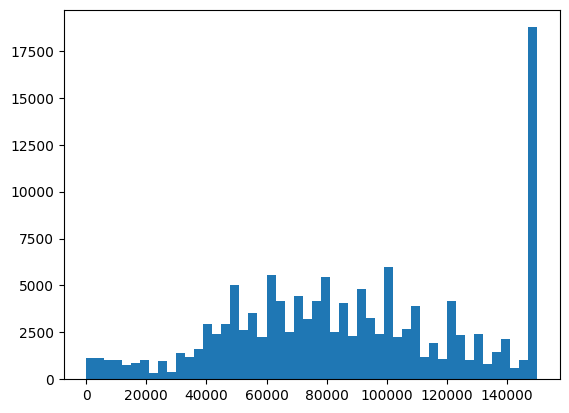

In [101]:
plt.hist(df2['SALARY'], bins=50)

array([[<Axes: title={'center': 'PERSONID'}>,
        <Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'WEIGHT'}>,
        <Axes: title={'center': 'SAMPLE'}>,
        <Axes: title={'center': 'SURID'}>,
        <Axes: title={'center': 'MRDG'}>,
        <Axes: title={'center': 'MR03Y5'}>,
        <Axes: title={'center': 'NMRMEDR'}>,
        <Axes: title={'center': 'NMRMEMG'}>,
        <Axes: title={'center': 'LFSTAT'}>,
        <Axes: title={'center': 'WRKG'}>],
       [<Axes: title={'center': 'FPTIND'}>,
        <Axes: title={'center': 'WRKGP'}>,
        <Axes: title={'center': 'EMSMI'}>,
        <Axes: title={'center': 'HRSWKGR'}>,
        <Axes: title={'center': 'WKSWKGR'}>,
        <Axes: title={'center': 'JOBINS'}>,
        <Axes: title={'center': 'JOBPENS'}>,
        <Axes: title={'center': 'JOBPROFT'}>,
        <Axes: title={'center': 'JOBVAC'}>,
        <Axes: title={'center': 'PTWTFT'}>,
        <Axes: title={'center': 'PTFAM'}>],
       [<Axes: title={'center':

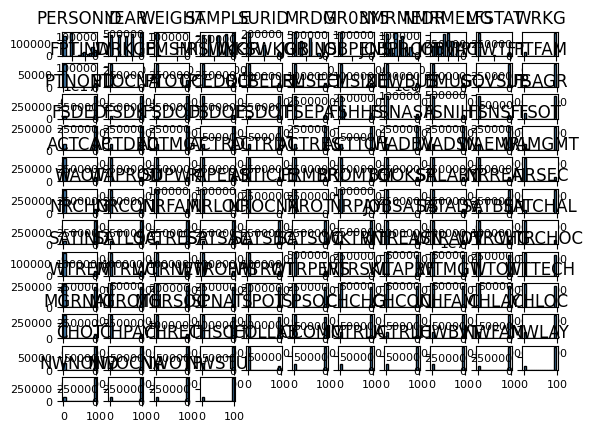

In [40]:
df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False)

# command to give space b/t diff. plots 
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

In [37]:
import matplotlib
corr = df.corr()
corr.style.background_gradient('coolwarm')

ImportError: background_gradient requires matplotlib.

In [25]:
len(df['PERSONID'].unique())

244071

In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(df)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values